In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
df1 = pd.read_csv('datasets/insurance_data.csv')
df=df1.copy()

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


### Missing values are in age and region coulumn

In [287]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


**Numrical columns**
- index , PatientID , age , bmi , bloodpressure , claim , children

**catigorical columns**

- gender , diabetic , smoker , region

In [288]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [289]:
df['age'].isnull().sum()

np.int64(5)

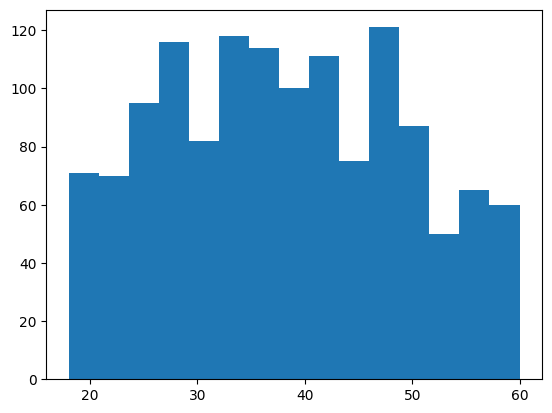

In [290]:
plt.hist(x=df['age'],bins=15)
plt.show()

<Axes: ylabel='Density'>

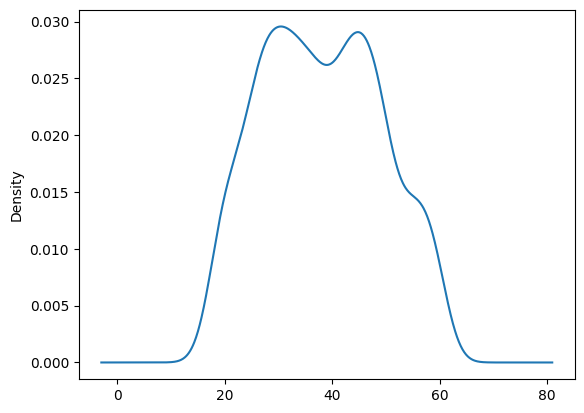

In [291]:
df['age'].plot(kind='kde')

In [292]:
df['age'].skew()

np.float64(0.11361133741072633)

### age
**conclusion**
age has missing values

In [293]:
# bmi
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<Axes: ylabel='Frequency'>

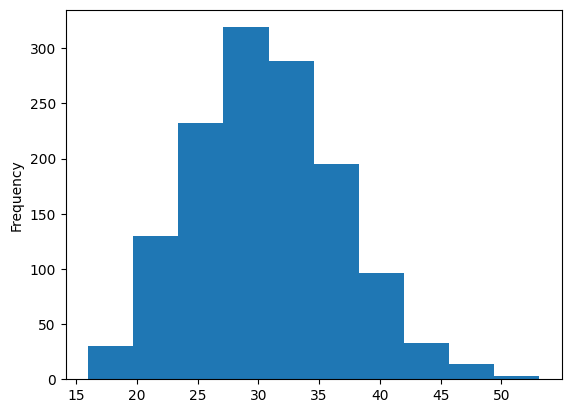

In [294]:
df['bmi'].plot(kind='hist')

<Axes: >

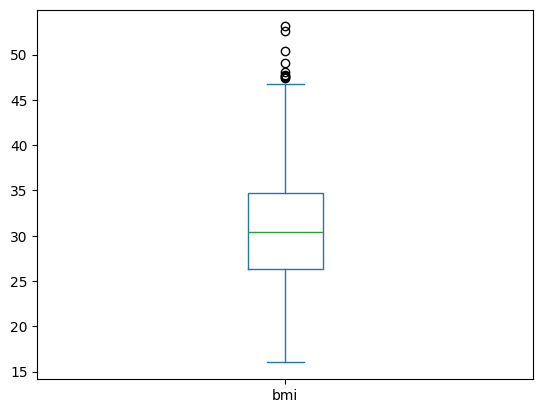

In [295]:
df['bmi'].plot(kind='box')

In [296]:
'''
Underweight: <18.5
Normal: 18.5-24.9
Overweight: 25-29.9
Obese: ≥30
'''
def bmi_cat(num):
    if num < 18.5:
        return 'Underweight'
    elif num >= 18.5 and num <= 24.9:
        return 'Normal'
    elif num >= 25 and num <= 29.9:
        return ' Overweight'
    else:
        return 'Obese'
        

In [297]:
df.insert(5,'bmi cat',df['bmi'].apply(bmi_cat))

<Axes: ylabel='Density'>

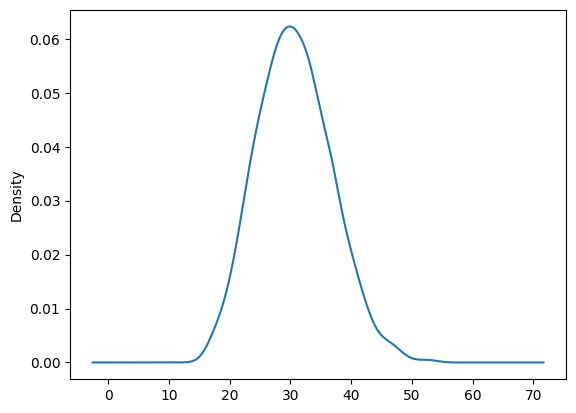

In [298]:
df['bmi'].plot(kind='kde')

In [299]:
df['bmi'].skew()

np.float64(0.28597245020808587)

### bmi
**conclusions**

- normally distributed
- contains outliers
- by feature engineering create new column who contain bmi categories

In [300]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<Axes: >

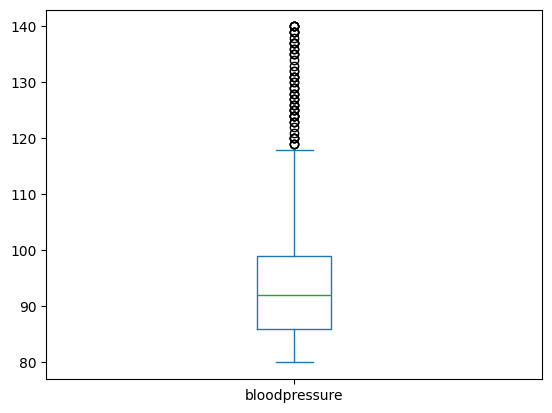

In [301]:
df['bloodpressure'].plot(kind='box')

<Axes: ylabel='Density'>

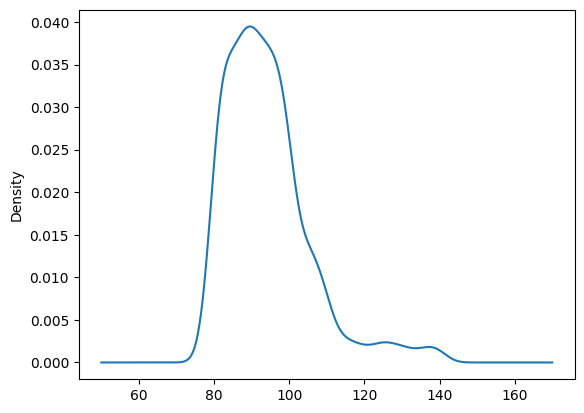

In [302]:
df['bloodpressure'].plot(kind='kde')

In [303]:
df['bloodpressure'].skew()

np.float64(1.4835342102293079)

In [304]:
# feature engineering
def bp_cat(x):
    if x < 120:
        return 'Normal'
    elif x<=129:
        return "Elevated"
    else :
        return 'Hypertension'

In [305]:

df.insert(7,'bp_level',df['bloodpressure'].apply(bp_cat))

<Axes: ylabel='count'>

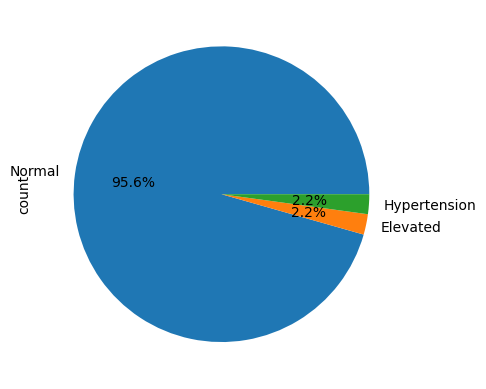

In [306]:
df['bp_level'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### bloodpressure

**conclusion**
- The data is highly skewed (positvely)
- contains outliers
- create bloodpressure cat 

In [307]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

<Axes: ylabel='Frequency'>

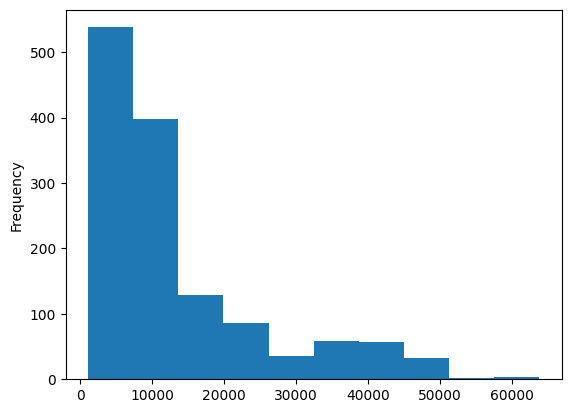

In [308]:
df['claim'].plot(kind='hist')

<Axes: ylabel='Density'>

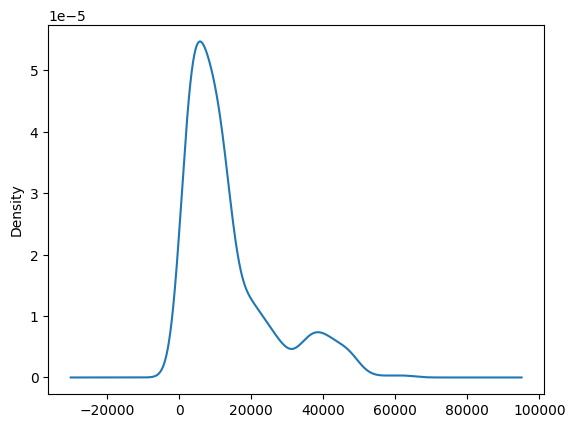

In [309]:
df['claim'].plot(kind='kde')

In [310]:
df['claim'].skew()

np.float64(1.5167468509489237)

<Axes: >

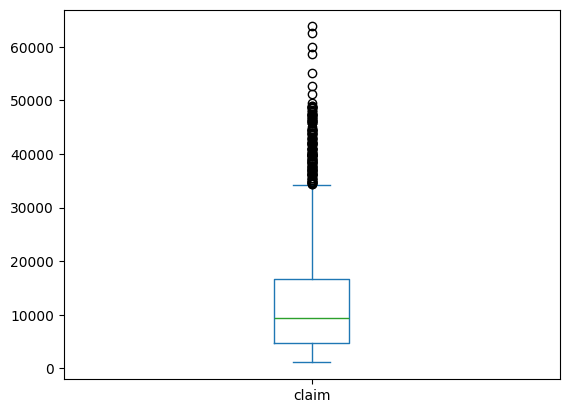

In [311]:
df['claim'].plot(kind='box')

### claims
- contain outliars
- highly skewed


In [312]:
#- gender , diabetic , smoker , region -> catigorical 



### univariate eda

**gender**

- male and female are almost in same ratio 
- no missing values



In [313]:
df['gender'].value_counts()

gender
male      678
female    662
Name: count, dtype: int64

<Axes: xlabel='gender'>

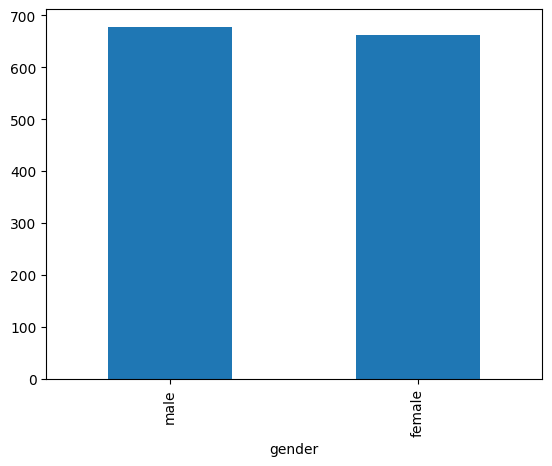

In [314]:
df['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

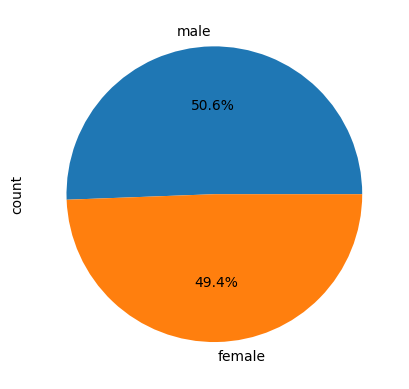

In [315]:
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [316]:
df['gender'].isnull().sum()

np.int64(0)

**diabetic**
- The numbers of diabtics people are less 
- No missing values
- 52.1% are in no category and 47.9% are from yes ctegory

In [317]:
df['diabetic'].value_counts()

diabetic
No     698
Yes    642
Name: count, dtype: int64

<Axes: ylabel='count'>

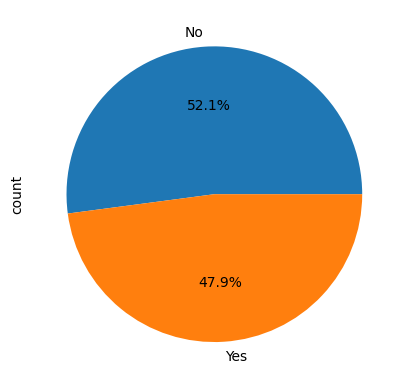

In [318]:
df['diabetic'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [319]:
df['diabetic'].isnull().sum()

np.int64(0)

**smoker**
- NO missing values 
- The nums of smoker are very less then the number non smoker (positive poin)
- 20.4% are smokers while 79.6 are non smokers

In [320]:
df['smoker'].value_counts()

smoker
No     1066
Yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

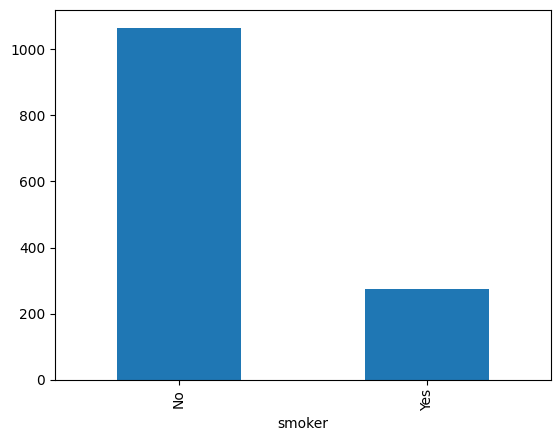

In [321]:
df['smoker'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

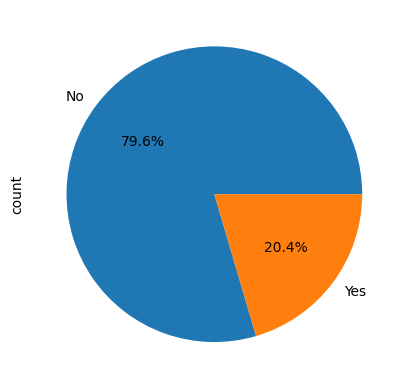

In [322]:
df['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [323]:
df['smoker'].isnull().sum()

np.int64(0)

**region**
- More nums of people from southwest 443
- There are 3 missing values

In [324]:
df['region'].value_counts()

region
southeast    443
northwest    349
southwest    314
northeast    231
Name: count, dtype: int64

<Axes: xlabel='region'>

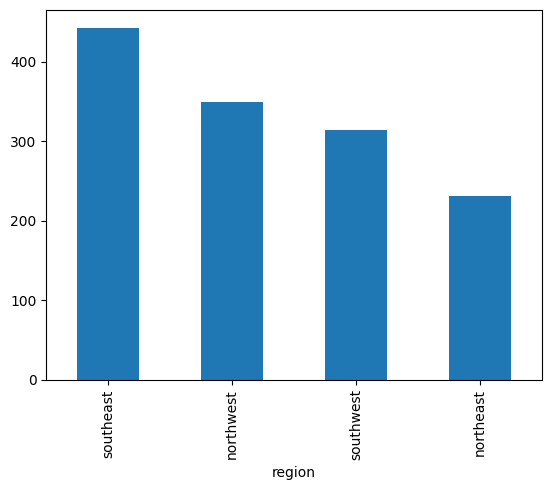

In [325]:
df['region'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

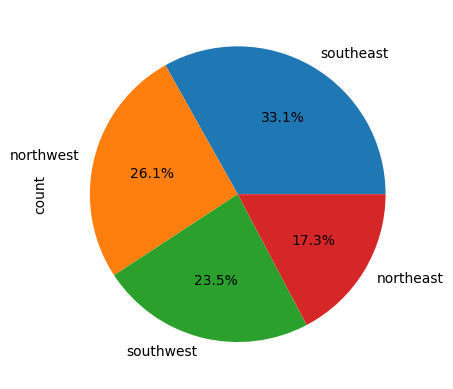

In [326]:
df['region'].value_counts().plot(kind='pie',autopct='%1.1f%%')

**feature engineering**

In [327]:
if df['region'].isnull().sum() > 0:
    df['region'].fillna(df['region'].mode()[0], inplace=True)
    print("Missing values imputed with mode:", df['region'].mode()[0])


Missing values imputed with mode: southeast


C:\Users\HP\AppData\Local\Temp\ipykernel_6896\2360875226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].fillna(df['region'].mode()[0], inplace=True)


In [ ]:
# feature engineering

# Calculate median age (median is better than mean for age as it's less affected by outliers)
median_age = df['age'].median()

# Fill missing values with median
df['age'] = df['age'].fillna(median_age)

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [336]:
df['age']=df['age'].astype(int)

In [338]:
df

,index,PatientID,age,gender,bmi,bmi cat,bloodpressure,bp_level,diabetic,children,smoker,region,claim
0,0,1,39,male,23.2,Normal,91,Normal,Yes,0,No,southeast,1121.87
1,1,2,24,male,30.1,Obese,87,Normal,No,0,No,southeast,1131.51
2,2,3,38,male,33.3,Obese,82,Normal,Yes,0,No,southeast,1135.94
3,3,4,38,male,33.7,Obese,80,Normal,No,0,No,northwest,1136.40
4,4,5,38,male,34.1,Obese,100,Normal,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44,female,35.5,Obese,88,Normal,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59,female,38.1,Obese,120,Elevated,No,1,Yes,northeast,58571.07
1337,1337,1338,30,male,34.5,Obese,91,Normal,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37,male,30.4,Obese,106,Normal,No,0,Yes,southeast,62592.87
